In [ ]:
### Executar para utilização do MatPlotLib e Seaborn
# !pip install matplotlib
# !pip install seaborn

In [136]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", index_col=0)
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


### REALIZE ANÁLISES EXPLORATÓRIAS NOS DADOS E RESPONDA AS SEGUINTES PERGUNTAS:


#### 1. Qual(s) a(s) companhia(s) que mais registram atrasos? Analise qualitativamente e quantitativamente.

##### Premissa -> arr_time >= 10 min 

In [138]:
# Remover valores nulos para as análises
df_1 = df.dropna(subset=['arr_delay', 'carrier'])

#Filtrando Voos que tiveram atraso de acordo com a premissa adotada
df_atraso = df_1[df_1['arr_delay'] >= 10]

In [139]:
# Analisando o atraso médio por companhia aérea
df_atraso.groupby('carrier')\
    ['arr_delay'].mean()\
    .sort_values(ascending=False)

carrier
OO    84.857143
YV    63.679803
9E    63.483615
VX    62.958262
EV    61.764376
F9    59.539216
WN    56.349811
FL    55.707101
DL    53.740081
B6    53.461552
AA    52.860225
MQ    50.880896
HA    50.215385
UA    50.102513
AS    46.333333
US    43.060528
Name: arr_delay, dtype: float64

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14932\3178878808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_media_atraso.index, y=df_media_atraso.values, palette='Reds')


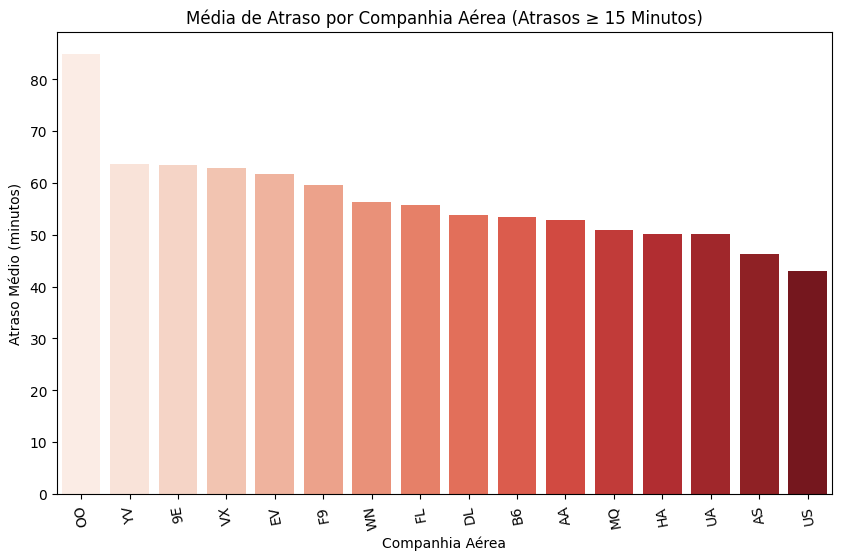

In [140]:
df_media_atraso = df_atraso.groupby('carrier')\
    ['arr_delay'].mean()\
    .sort_values(ascending=False)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=df_media_atraso.index, y=df_media_atraso.values, palette='Reds')
plt.title('Média de Atraso por Companhia Aérea (Atrasos ≥ 15 Minutos)')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(rotation=100)
plt.show()

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14932\233875011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_c_atraso.index, y=df_c_atraso.values, palette='Reds')


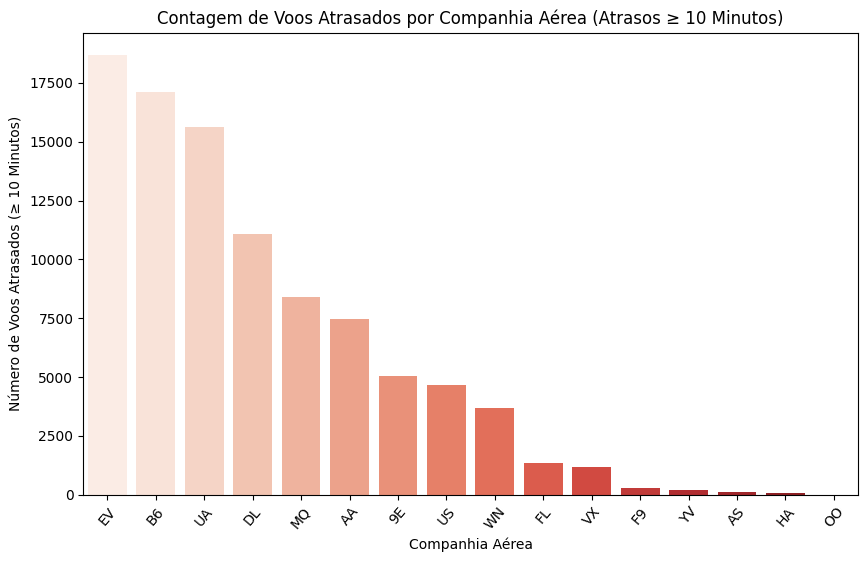

In [141]:
df_c_atraso = df_atraso.groupby('carrier')\
    ['arr_delay'].count()\
    .sort_values(ascending=False)
    
    
plt.figure(figsize=(10, 6))
sns.barplot(x=df_c_atraso.index, y=df_c_atraso.values, palette='Reds')
plt.title('Contagem de Voos Atrasados por Companhia Aérea (Atrasos ≥ 10 Minutos)')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos Atrasados (≥ 10 Minutos)')
plt.xticks(rotation=50)
plt.show()

** Quantitativamente: 

As top 4 companhia aérea listadas com atrasos maiores ou iguais a 10 minutos são: EV, B6, UA, e DL.

**Qualitativamente:

Dentre os atrasos listados no gráfico 01, temos a companhia aérea "OO" com atraso exorbitante acima dos 1 h e 20 minutos, as companhias "YV, 9E, VX, EV e F9" vem com um atraso parecidos em torno de 1 h.



#### 2. A rota ou aeronave podem influenciar nos atrasos?

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_14932\2940563192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atraso_q2['route'] = df_atraso_q2['origin'] + '-' + df_atraso_q2['dest']


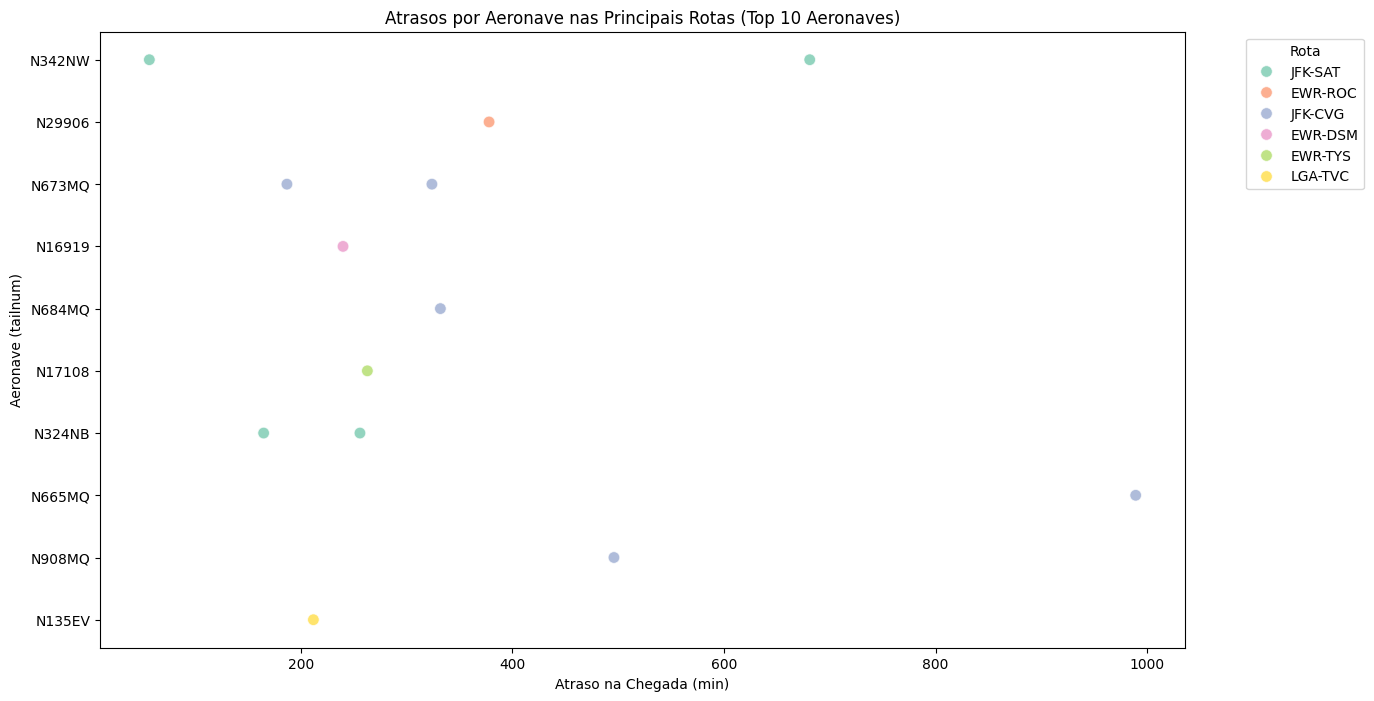

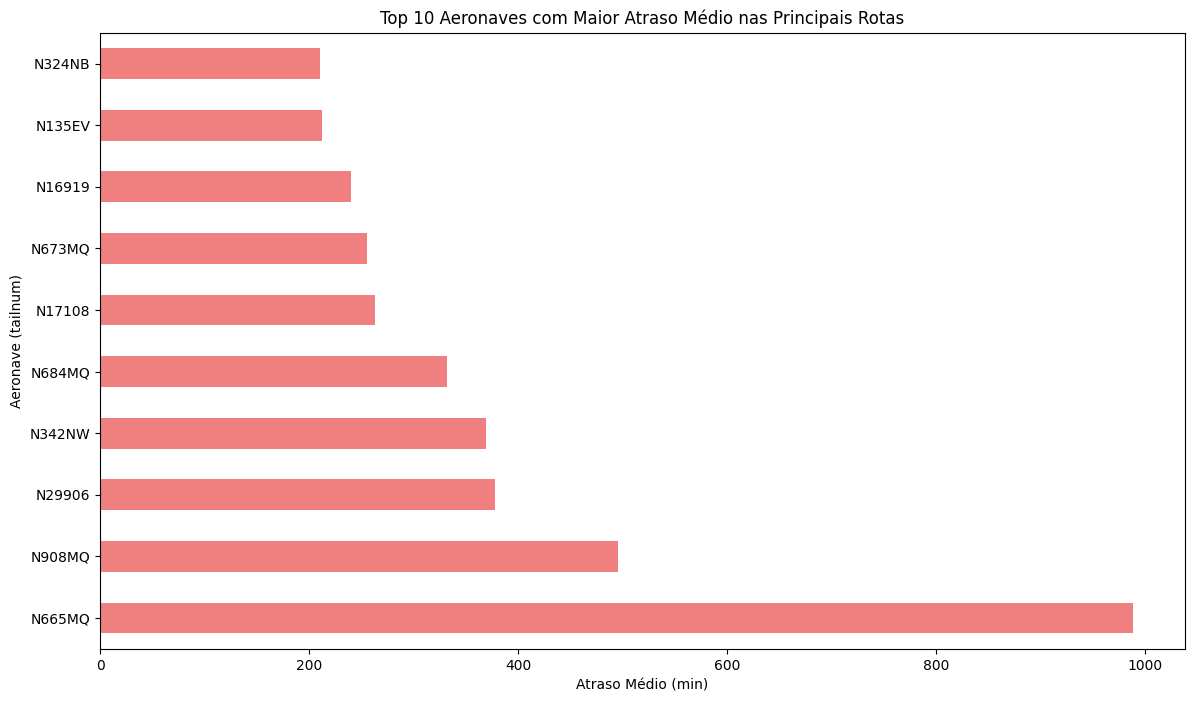

In [142]:
df_atraso_q2 = df_atraso

# Criando uma coluna que une origem e destino para definir a rota
df_atraso_q2['route'] = df_atraso_q2['origin'] + '-' + df_atraso_q2['dest']

# Selecionar as top 10 rotas com maior atraso médio
df_rota_media = df_atraso_q2.groupby('route')['arr_delay'].mean().sort_values(ascending=False)
df_top_rota = df_rota_media.head(10).index

# Filtrar os dados apenas para essas rotas
df_filtro = df_atraso_q2[df_atraso_q2['route'].isin(top_routes)]

top_tailnums = df_filtro.groupby('tailnum')['arr_delay'].mean().sort_values(ascending=False).head(10).index

# Filtrar os dados para apenas essas aeronaves
df_filtro_top = df_filtro[df_filtro['tailnum'].isin(top_tailnums)]

# Gráfico Analítico: Dispersão dos atrasos por aeronave nas principais rotas (focando nas 10 principais aeronaves)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_filtro_top, x='arr_delay', y='tailnum', hue='route', palette='Set2', s=70, alpha=0.7)
plt.title('Atrasos por Aeronave nas Principais Rotas (Top 10 Aeronaves)')
plt.xlabel('Atraso na Chegada (min)')
plt.ylabel('Aeronave (tailnum)')
plt.legend(title='Rota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Gráfico Executivo: Atraso médio por aeronave nas principais rotas (top 10)
df_medio_rota = df_filtro.groupby('tailnum')['arr_delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
df_medio_rota.head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Aeronaves com Maior Atraso Médio nas Principais Rotas')
plt.xlabel('Atraso Médio (min)')
plt.ylabel('Aeronave (tailnum)')
plt.show()

Resposta: Sim, tanto a rota quanto a aeronave podem influenciar nos atrasos.

Rota:
Certas rotas mostraram uma tendência a ter maiores atrasos médios, podendo ser os causadores o clima, congestionamento áereo, a região, ou complexidades do tráfego nos aeropóstos de destino. Verificando o gráfico o atraso médio por rota indicou que algumas rotas apresentam consistentemente maiores atrasos do que outras.

Aeronave:
A análise também sugere que a aeronave pode ter impacto nos atrasos. Ao focar nas aeronaves com os maiores atrasos médios, ficou evidente que algumas têm um desempenho pior em termos de pontualidade, especialmente em rotas específicas. Isso pode estar relacionado ao modelo da aeronave, sua manutenção, idade, ou até mesmo a eficiência das operações da companhia aérea associada.

#### 3. Existe algum padrão ou tendência nos atrasos ? Se sim, o que pode ser feito para reduzi-los?

In [143]:
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour < 17:
        return 'Tarde'
    elif 17 <= hour < 24 :
        return 'Noite'
    elif 0 <= hour < 5:
        return 'Madrugada'
    else:
        return 'Indefinido'

df['periodo_dia'] = df['hour'].apply(lambda x: get_time_period(x))

In [144]:
atrasos_por_periodo = df[df['dep_delay'] > 0].groupby('periodo_dia').size()

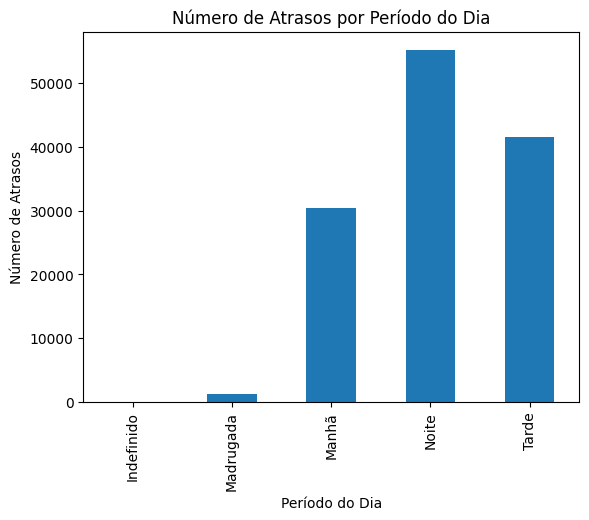

In [145]:

atrasos_por_periodo.plot(kind='bar')
plt.title('Número de Atrasos por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Número de Atrasos')
plt.show()

In [ ]:
Sim, atrasos tendem a ser mais frequentes em horários de pico, como manhãs e finais de tarde, quando o tráfego aéreo é mais intenso.

Distribuir os voos de maneira mais equilibrada ao longo do dia para evitar picos de tráfego.